In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3234,ham,"Yes, princess. Toledo.",NaN,NaN,NaN
1004,ham,Umma. Did she say anything,NaN,NaN,NaN
576,ham,I'm tired of arguing with you about this week ...,NaN,NaN,NaN
4097,ham,I think just yourself Û_Thanks and see you tomo,NaN,NaN,NaN
5205,spam,Had your mobile 11mths ? Update for FREE to Or...,NaN,NaN,NaN
2047,ham,No de. But call me after some time. Ill tell y...,NaN,NaN,NaN
1221,ham,Prakesh is there know.,NaN,NaN,NaN
2589,spam,Join the UK's horniest Dogging service and u c...,NaN,NaN,NaN
1472,ham,Just sent you an email ÛÒ to an address with ...,NaN,NaN,NaN
5041,spam,Jamster! To get your free wallpaper text HEART...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
# renaming the cols
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
3390,ham,"I'm in a meeting, call me later at"
1507,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."
2880,ham,Printer is cool. I mean groovy. Wine is groovying
1559,ham,Single line with a big meaning::::: \Miss anyt...
3498,ham,I hope you arnt pissed off but id would really...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(10)

,Target,Text
614,0,I called and said all to him:)then he have to ...
131,0,"Dear, will call Tmorrow.pls accomodate."
5210,0,Dai i downloaded but there is only exe file wh...
4917,0,Sitting in mu waiting for everyone to get out ...
120,1,URGENT! Your Mobile No. was awarded å£2000 Bon...
1986,0,S..antha num corrct dane
5434,0,Jesus armand really is trying to tell everybod...
1734,0,"I think we're going to finn's now, come"
210,0,"What's up bruv, hope you had a great break. Do..."
5390,0,Nt joking seriously i told


In [13]:
# missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

In [17]:
## EDA

In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

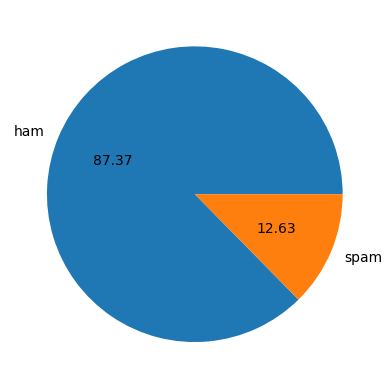

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
## Data is imbalanced

In [21]:
import nltk

In [48]:
nltk.download('punkt')
nltk.download()

[nltk_data] Downloading package punkt to /Users/chadsglm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [25]:
df['num_characters'] = df['Text'].apply(len)

/var/folders/_x/c69d2mwn5vg_tm50kkcngf3c0000gn/T/ipykernel_10557/3954161518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [26]:
df.sample(10)

,Target,Text,num_characters
173,0,"Bloody hell, cant believe you forgot my surnam...",105
3692,0,I was about to do it when i texted. I finished...,90
3464,0,"Haha figures, well I found the piece and prisc...",57
4458,1,Welcome to UK-mobile-date this msg is FREE giv...,151
505,0,No it's waiting in e car dat's bored wat. Cos ...,117
711,0,It just seems like weird timing that the night...,195
4641,1,You are being ripped off! Get your mobile cont...,143
2817,0,Thk some of em find wtc too far... Weiyi not g...,123
4046,1,"Thanks for your ringtone order, reference numb...",156
3566,1,Collect your VALENTINE'S weekend to PARIS inc ...,134


In [27]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/_x/c69d2mwn5vg_tm50kkcngf3c0000gn/T/ipykernel_10557/1152211522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.sample(10)

,Target,Text,num_characters,num_words
2911,0,You didn't have to tell me that...now i'm thin...,89,23
478,0,"K, can I pick up another 8th when you're done?",46,13
3077,0,Okay but i thought you were the expert,38,8
4163,0,"Its ok, called mom instead have fun",35,8
4436,0,How come u got nothing to do?,29,8
1799,0,"If we hit it off, you can move in with me :)",44,14
3449,0,Ya just telling abt tht incident..,34,7
1506,1,Thanks for the Vote. Now sing along with the s...,121,27
5507,0,I want to be inside you every night...,38,9
1184,0,"Yo, you around? Just got my car back",36,10


In [29]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/_x/c69d2mwn5vg_tm50kkcngf3c0000gn/T/ipykernel_10557/1884457437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:
df.sample(10)

,Target,Text,num_characters,num_words,num_sentences
3216,0,Come to mahal bus stop.. &lt;DECIMAL&gt;,40,13,1
3470,0,Heart is empty without love.. Mind is empty wi...,176,39,5
248,0,It didnt work again oh. Ok goodnight then. I.l...,146,34,4
3101,0,Even if he my friend he is a priest call him now,48,12,1
1196,0,What he said is not the matter. My mind saying...,74,17,2
3738,0,Did you stitch his trouser,26,5,1
317,0,"Not really dude, have no friends i'm afraid :(",46,12,1
2947,0,Nope but i'll b going 2 sch on fri quite early...,87,24,1
3291,0,Dear good morning how you feeling dear,38,7,1
4198,1,"cmon babe, make me horny, *turn* me on! Txt me...",148,39,4


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# Ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# Spam
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

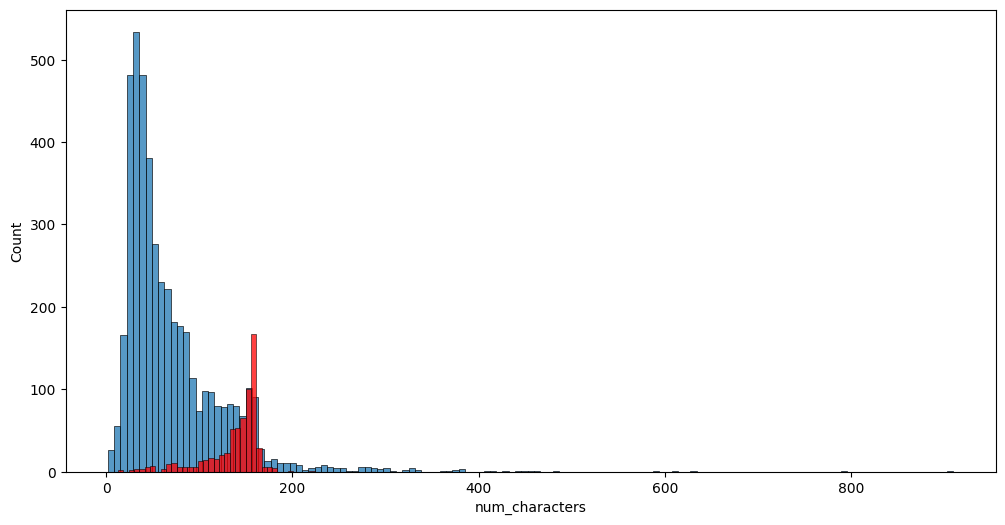

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

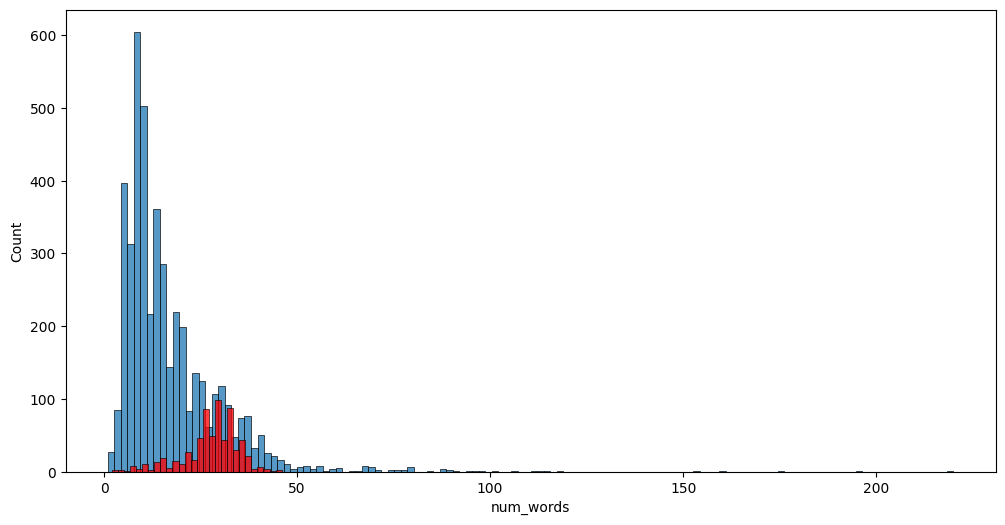

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


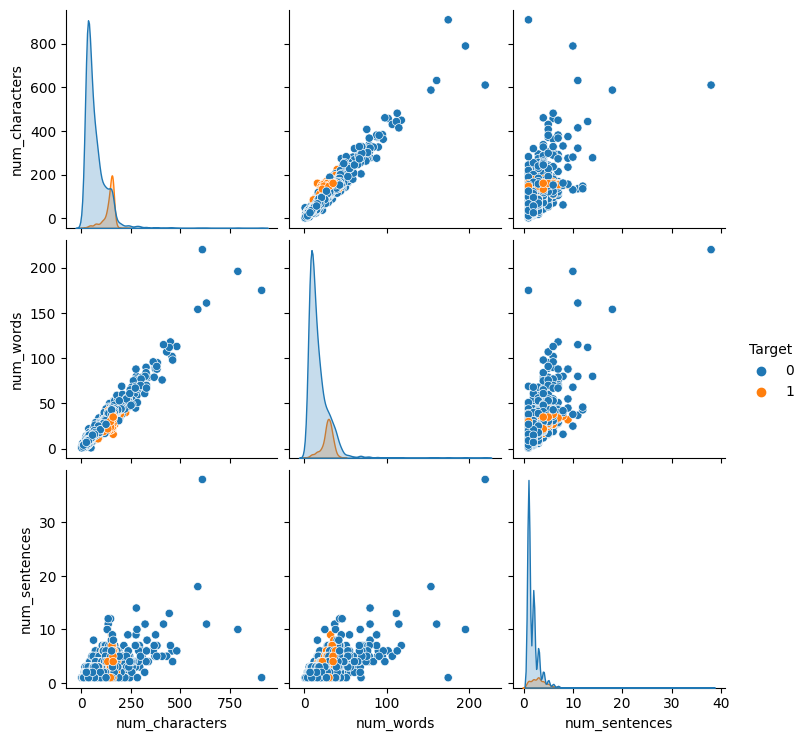

In [38]:
sns.pairplot(df,hue='Target')

In [53]:
## Data Preprocessing

In [64]:
def transform_text(text):
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [65]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [66]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [67]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [68]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [69]:
df.sample(10)

,Target,Text,num_characters,num_words,num_sentences,transformed_text
2493,0,they released another Italian one today and it...,66,12,1,releas anoth italian one today cosign option
1660,0,No just send to you. Bec you in temple na.,42,12,2,send bec templ na
2722,0,It's justbeen overa week since we broke up and...,84,18,1,justbeen overa week sinc broke alreadi brain g...
1344,0,Were somewhere on Fredericksburg,32,4,1,somewher fredericksburg
4111,0,"I'll see, but prolly yeah",25,7,1,see prolli yeah
5487,1,2p per min to call Germany 08448350055 from yo...,145,33,4,2p per min call germani 08448350055 bt line 2p...
5227,0,I re-met alex nichols from middle school and i...,71,15,1,alex nichol middl school turn deal
4230,0,U really pig leh sleep so much. My dad wake me...,79,21,2,u realli pig leh sleep much dad wake 10 smth 2...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name
4803,0,"Er, hello, things didnÛ÷t quite go to plan Û...",114,23,1,er hello thing quit go plan limp slowli home f...


In [70]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [71]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

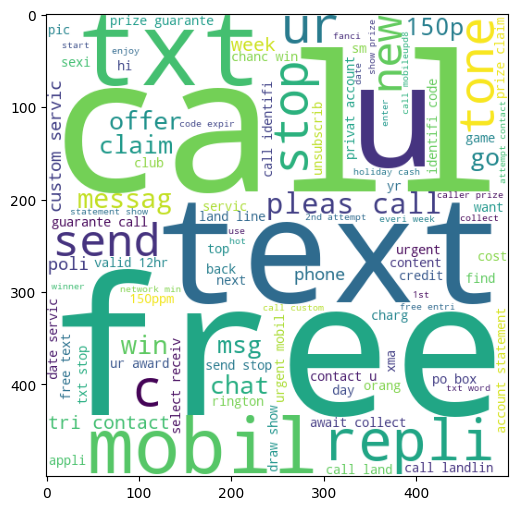

In [72]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [73]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

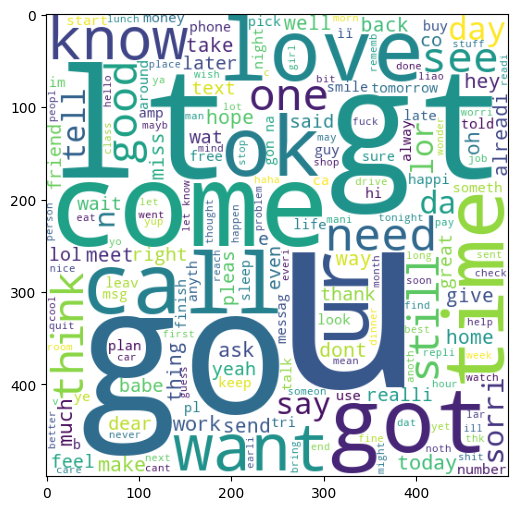

In [74]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [75]:
df.sample(10)

,Target,Text,num_characters,num_words,num_sentences,transformed_text
5200,1,Call Germany for only 1 pence per minute! Call...,151,29,5,call germani 1 penc per minut call fix line vi...
4052,0,I was slept that time.you there?,32,7,1,slept
1644,0,India have to take lead:),25,7,1,india take lead
4678,0,Sry da..jst nw only i came to home..,36,11,1,sri da jst nw came home
475,0,Ok I'm gonna head up to usf in like fifteen mi...,51,13,1,ok gon na head usf like fifteen minut
1182,0,"K give me a sec, breaking a &lt;#&gt; at cstore",49,17,1,k give sec break lt gt cstore
1945,0,Can Ì_ call me at 10:10 to make sure dat i've ...,57,15,1,call make sure dat woken
1271,0,If you still havent collected the dough pls le...,116,26,1,still havent collect dough pl let know go plac...
5224,0,\OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE ...,112,31,6,fuck juswok bed boatin dock slept wid 25 year ...
1405,0,K..k..any special today?,24,8,1,k k special today


In [76]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [77]:
len(spam_corpus)

9939

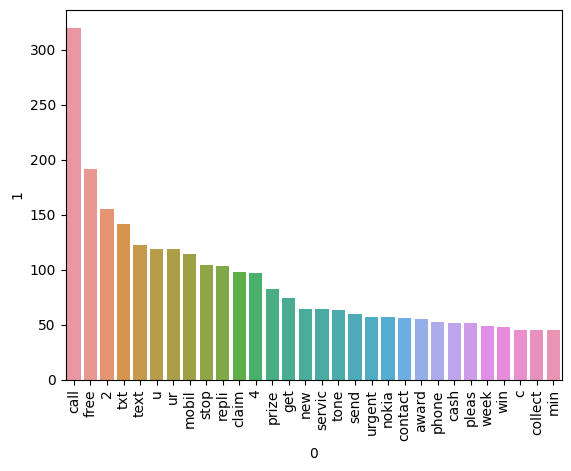

In [79]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [80]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [81]:
len(ham_corpus)

35404

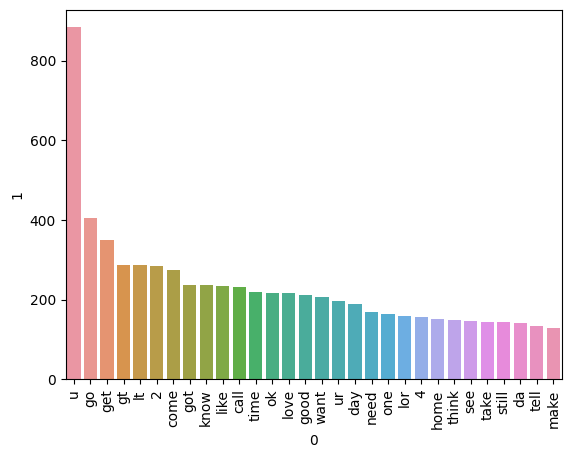

In [82]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [83]:
## Model Building

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [85]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [86]:
X.shape

(5169, 3000)

In [93]:
y = df['Target'].values
y.shape

(5169,)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [90]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [94]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [95]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [96]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [97]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [104]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [105]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [106]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [107]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [108]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [109]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.970986,1.000000
4,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.958414,0.970297
5,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
6,BgC,0.958414,0.868217
2,DT,0.929400,0.828283


In [111]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.970986
1,RF,Accuracy,0.975822
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.974855
4,LR,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.929400


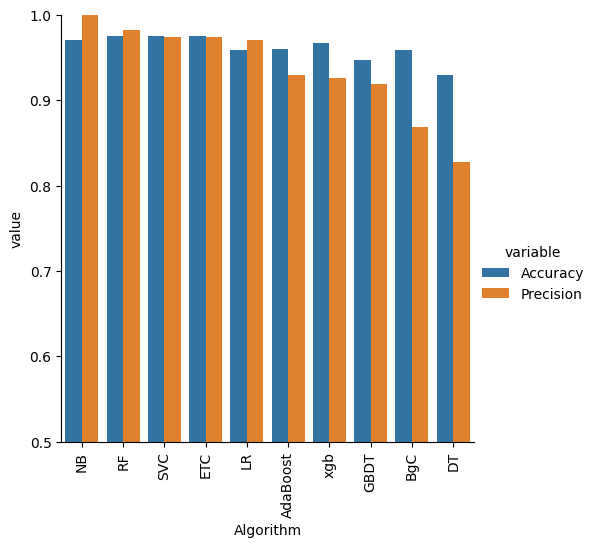

In [112]:
sns.catplot(x = 'Algorithm', y='value', 
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [113]:
# Model improve

In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),
                        'Accuracy_max_ft_3000':accuracy_scores,
                        'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [115]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),
                        'Accuracy_scaling':accuracy_scores,
                        'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [116]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [117]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [118]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),
                        'Accuracy_num_chars':accuracy_scores,
                        'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [119]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
1,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
2,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
3,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


In [120]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [121]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [122]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [124]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [125]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [126]:
from sklearn.ensemble import StackingClassifier

In [127]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [128]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [129]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))